In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [4]:
class Adagrad:
    def __init__(self, lr=0.01, epsilon=1e-8):
        self.lr = lr
        self.epsilon = epsilon
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + self.epsilon)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

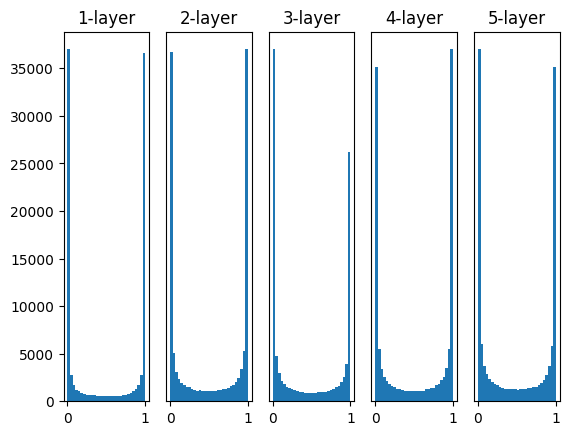

In [6]:
for i, a in activations.items():
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer")
    if i!= 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 0.1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

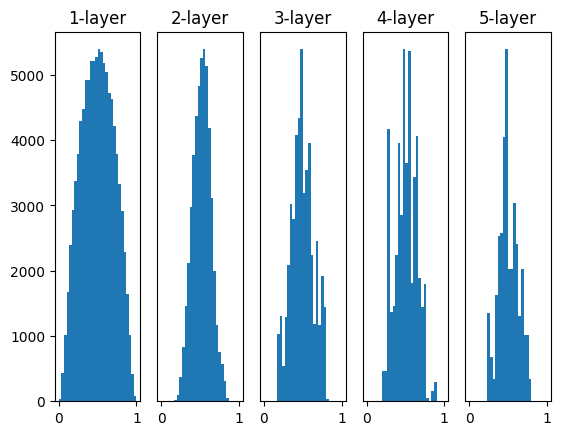

In [8]:
for i, a in activations.items():
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer")
    if i!= 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

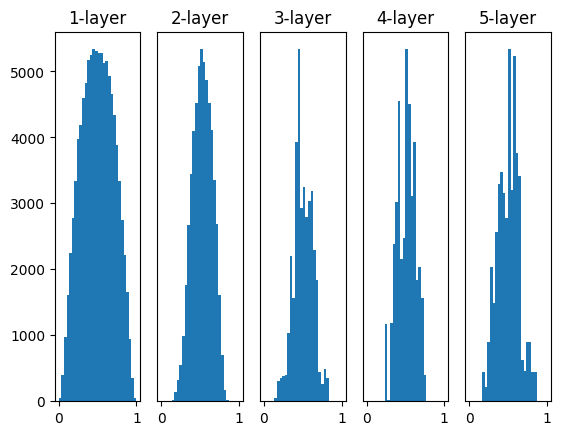

In [10]:
for i, a in activations.items():
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer")
    if i!= 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [15]:
import sys, os
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        
    if epoch_cnt >= max_epochs:
        break


epoch:0, train acc:0.12333333333333334, test acc:0.1096
epoch:1, train acc:0.15666666666666668, test acc:0.1207
epoch:2, train acc:0.17666666666666667, test acc:0.1431
epoch:3, train acc:0.2, test acc:0.1585
epoch:4, train acc:0.19333333333333333, test acc:0.1734
epoch:5, train acc:0.23666666666666666, test acc:0.1972
epoch:6, train acc:0.27666666666666667, test acc:0.217
epoch:7, train acc:0.30333333333333334, test acc:0.2356
epoch:8, train acc:0.30666666666666664, test acc:0.253
epoch:9, train acc:0.36666666666666664, test acc:0.2736
epoch:10, train acc:0.38666666666666666, test acc:0.2854
epoch:11, train acc:0.4, test acc:0.2904
epoch:12, train acc:0.3933333333333333, test acc:0.2919
epoch:13, train acc:0.4266666666666667, test acc:0.3099
epoch:14, train acc:0.4266666666666667, test acc:0.3161
epoch:15, train acc:0.45, test acc:0.3227
epoch:16, train acc:0.45666666666666667, test acc:0.3308
epoch:17, train acc:0.49333333333333335, test acc:0.35
epoch:18, train acc:0.5066666666666667

In [12]:
class dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

In [13]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [14]:
import numpy as np

weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)